<a href="https://colab.research.google.com/github/seemantKaul/MachineLearning/blob/master/Kaggle_Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classifier to identify the breed of a dog from image

---

## Problem
To identify the breed of a dog from picture

## Data Source
Data is from Kaggle.com
https://www.kaggle.com/c/dog-breed-identification/data

## Evaluation
output is a probability number of each breed for an image   
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features
We have unstructured data (images) so we will do a Transfer learning.
We have 10,000 images in Training and 10,000 images in Test
We have a csv file with filename and its breed. 



In [0]:
# import tensorflow as tf

# Importing Tensorflow

In [2]:
## import tenserflow 2.x
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [4]:
tf.__version__

'2.1.0'

# Getting Data and environment ready

### Unzipping files

In [0]:
# !unzip 'drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/dog-breed-identification.zip' -d '/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/'

### comparing file count with Label count

In [0]:
import pandas as pd
labels_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/labels.csv')

In [7]:
len(labels_df)

10222

In [0]:
# import os
# len(os.listdir('/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/train/'))

### Importing Tensorflow hub

In [0]:
import tensorflow_hub as hub

### Checking if GPU is installed
if not, clik on 'Chnage Runtime type' and select GPU


In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visualizing the cass spread

In [11]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


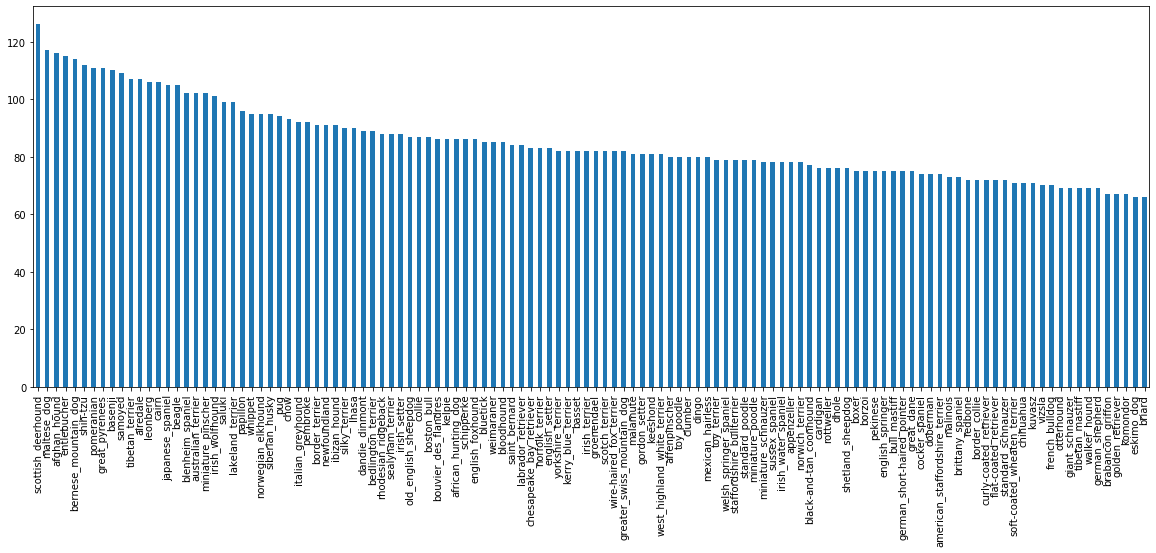

In [12]:
labels_df["breed"].value_counts().plot(kind="bar", figsize = (20,7));

In [13]:
labels_df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,269943ddbcdae9ecf9f1eccd95503173,scottish_deerhound
freq,1,126


In [14]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


### Creating target matrix of boolean values

In [0]:
# grab unique breeds
import numpy as np
breeds = np.array(labels_df['breed'])

In [16]:
len(breeds)

10222

In [0]:
breed_header = np.unique(breeds)

In [18]:
len(breed_header)

120

In [0]:
target_matrix = [(breed==breed_header) for breed in breeds]

In [0]:
label_bool = np.array(target_matrix)

In [21]:
label_bool[:10]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Getting filenames

In [0]:
filenames = "/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/train/" + labels_df['id'] + ".jpg"

In [23]:
filenames.head()

0    /content/drive/My Drive/Colab Notebooks/Data/D...
1    /content/drive/My Drive/Colab Notebooks/Data/D...
2    /content/drive/My Drive/Colab Notebooks/Data/D...
3    /content/drive/My Drive/Colab Notebooks/Data/D...
4    /content/drive/My Drive/Colab Notebooks/Data/D...
Name: id, dtype: object

In [0]:
# Open a file and check
from IPython.display import display, Image


In [0]:
# Image(filenames[100]), labels_df['breed'][112]


## Split Train data into Train and Validate set

In [0]:
SIZE_LIMIT = 1000 #@param {type:"slider", min:1000, max:10223, step:1 }
X = filenames[:SIZE_LIMIT]
y = label_bool[:SIZE_LIMIT]

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [28]:
len(X_train), len(X_val),  len(y_train), len(y_val)

(800, 200, 800, 200)

In [29]:
y_train[:2]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, Fals

# Image pre-processing
## create a fuction for Image pre-processing
1. Reads an image filepath as input
2. Use Tensorflow to read the file and save it to a variable 'image'
3. Converts the 'image' to Tensor (matrix of numbers)
4. Normalize the color channels from (0-255) to (0-1)
5. resize the image to 224 X 224
6. Return the modified image


In [0]:
from matplotlib.pyplot import imread

In [0]:
# reading image as a numpy array
# image = imread(filenames[10])

In [0]:
# image[:2]

In [0]:
# converting numpy array into tensor
# tensor = tf.constant(image)

In [0]:
# tensor[:2]

In [0]:
IMG_SIZE = 224
def process_image(img_path, size = IMG_SIZE):
  """
  Reads an image filepath as input
  Use Tensorflow to read the file and save it to a variable 'image'
  Converts the 'image' to Tensor (matrix of numbers)
  Normalize the color channels from (0-255) to (0-1)
  resize the image to size provided (size depends on the model used)
  Return the modified image
  """
  # Read the file using tensorflow
  image = tf.io.read_file(img_path)
  
  # Convert file into tensor
  image = tf.image.decode_jpeg(image, channels=3)

  # Normalize the RGB channel
  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image
  image = tf.image.resize(image, size = [size, size])
  
  return image

## Make a function that returns the image and label as tuple of tensors 

In [0]:
def get_image_label(img_path, label):
  """
  Takes an image path and label as input and returns the processed image and 
  label in form of a tensor tuple 
  """
  # print(img_path)
  # print(label)
  image = process_image(img_path)
  # I have changed the return to label instead of tf.constant(label) because I 
  # was facing an issue when calling this function inside create_data_batches
  
  # return image, tf.constat(label) 
  return image, label

In [0]:
# get_image_label(X[42], y[42])

## Putting data into batches of size 32

### Create a function to turn all of our data into batches of 32
Takes input as (img_path, label) pair or just img_path depending on what type data set it is (Train, Vilidate, Test)
Shuffel the data if the type is Train, do not shuffle if it is Validate or Test type. It is better to shuffle the file paths rather than shuffeling images
turns all the data into batches of 32

In [0]:
BATCH_SIZE = 32
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, validation_data = False, test_data=False):
  """
  Takes input as (img_path, label) pair or just img_path depending on what type data set it is (Train, Vilidate, Test)
  Shuffel the data if the type is Train, do not shuffle if it is Validate or Test type. It is better to shuffle the file paths rather than shuffeling images
  turns all the data into batches of 32
  X: list of img_paths
  y: list of labels (optional)
  batch_size: size of a batch, 32 default
  validation_data: flag indicating this is validation data
  test_data: flag indicating this is test data  
  """
  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  elif validation_data:
    print("Creating batches for Validation data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    print("Creating batches for Training data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
    return data_batch


In [40]:
# X_val
# type(X_val)
train_data = create_data_batches(X_val, y_val, validation_data=True)
val_data = create_data_batches(X_train, y_train)
# d = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))


Creating batches for Validation data
Creating batches for Training data


# Visualizing the data

In [0]:
import matplotlib.pyplot as plt


## un-batching the data
it returns a numpy array of 32 images and 32 labels

In [0]:
images, labels = next(train_data.as_numpy_iterator())

In [43]:
type(images)


numpy.ndarray

In [44]:
# Finding the index of TRUE in the array of labels[0]
breed_header[labels[0].argmax()]

'cairn'

## Create a function that displays a 5 X 5 grid of photos and their corresponding labels


In [0]:
def show25images(images, labels):
  fig = plt.figure(figsize = (10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    # print(type(breed_header[labels[i].argmax()]))
    plt.title(breed_header[labels[i].argmax()])
    plt.axis("off")

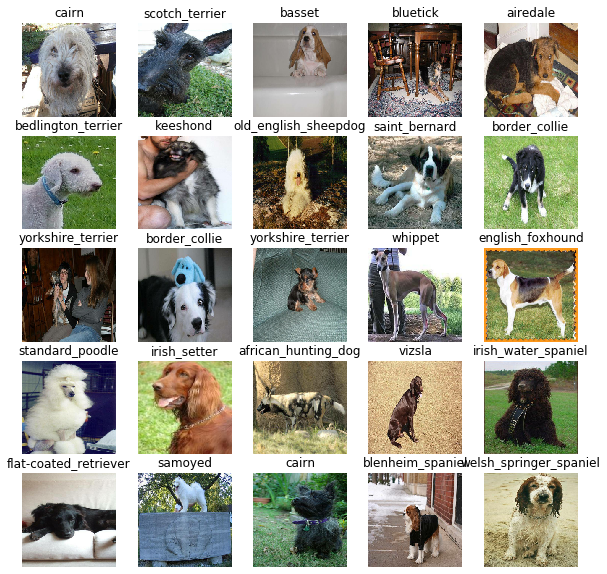

In [50]:
show25images(images, labels)